In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from os import walk
import pickle
from pathlib import Path
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point


/gxfs_home/cau/sunms498/.conda/envs/pytorch/lib/python3.11/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
def find_nearest(value,vector):
    vector = np.float64(vector)-np.float64(value);
    return np.argmin(np.abs(vector))


data_path = Path("/gxfs_work/cau/sunms498/work/nn-toc/data/raw/labels/") 
toc_labels_file = "KSeiter_global_TOC.tab.tsv"


In [3]:
df_1 = pd.read_csv(Path(data_path / toc_labels_file), sep = '\t', skiprows = 274)

In [4]:
df_1 = df_1[df_1["Depth [m]"]<=0.1]
df_1

Event  Latitude  Longitude  Elevation [m]  Depth [m]  Depth top [m]  \
0         3-14  -28.3315   -20.9410        -4343.0      0.000            NaN   
1         8-73   -1.9097  -137.4687        -4387.0      0.030            NaN   
2     10103-1B   36.1600    20.4800        -2880.0      0.050            NaN   
3     10103-8K   36.1600    20.4800        -2895.0      0.015            NaN   
4      108-663   -1.1978   -11.8785        -3706.0      0.000            NaN   
...        ...       ...        ...            ...        ...            ...   
5595  Y74-2-18   24.6970  -116.0950        -2795.0      0.000            NaN   
5596  Y74-2-22   23.7300  -112.4380        -3054.0      0.010            NaN   
5597   Y79-91P   -5.9500  -104.8667            NaN      0.050           0.03   
5598  ZTES-39G   28.6670  -144.9170        -5048.0      0.000            NaN   
5599  ZTES-40G   30.2000  -143.2830        -5050.0      0.000            NaN   

      Depth bot [m] Depth comm  TOC [%]  \
0               NaN        NaN     0.20   
1               NaN        NaN     0.10   
2               NaN        NaN     0.20   
3               NaN        NaN     0.30   
4               NaN        NaN     0.19   
...             ...        ...      ...   
5595            NaN        NaN     1.28   
5596            NaN        NaN     2.01   
5597           0.05        NaN     1.84   
5598            NaN        NaN     0.31   
5599            NaN        NaN     0.27   

                                            Method comm  \
0                                                   NaN   
1                                                   NaN   
2                            Element analyser CHN, LECO   
3                            Element analyser CHN, LECO   
4                                                   NaN   
...                                                 ...   
5595  not exactly given, techniques as CHN, LECO and...   
5596                                     UIC Coulometer   
5597  not exactly given, techniques as CHN, LECO and...   
5598  not exactly given, techniques as CHN, LECO and...   
5599  not exactly given, techniques as CHN, LECO and...   

                              Reference                 Comment  Sample label  
0                DSDP, JOI, NGDC (1989)                     NaN          1-14  
1                DSDP, JOI, NGDC (1989)                     NaN          8-73  
2                        Thomson (1982)  CLIVAMPNo. DI101038/1b      10103-1B  
3                        Thomson (1982)  CLIVAMPNo. DI101038/8K      10103-8K  
4                Wagner & Dupont (1999)                     NaN  108-663_site  
...                                 ...                     ...           ...  
5595       Cwienk (1986); Wenkam (1976)                     NaN      Y74218MG  
5596                 Lyle et al. (2000)                     NaN      Y74-2-22  
5597  Cwienk (1986); Molina-Cruz (1976)                     NaN        Y7991P  
5598        Cwienk (1986); Heath, unpub                     NaN     ZTSVII39G  
5599        Cwienk (1986); Heath, unpub                     NaN     ZTSVII40G  

[5600 rows x 13 columns]

In [5]:
df_1 = df_1[["Latitude","Longitude","TOC [%]"]]
df_1 = df_1[df_1["Longitude"]>-180]
df_1 = df_1.dropna(how="any")

In [6]:
import pandas as pd

# Group by Latitude and Longitude and filter groups with more than one entry
df_1 = df_1.groupby(['Latitude', 'Longitude']).filter(lambda x: len(x) > 0)

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_1)

# Group the data by Latitude and Longitude and calculate the mean of each group
df_1 = df_1.groupby(['Latitude', 'Longitude'], as_index=False).mean()

# Display the resulting DataFrame with averaged locations
print("DataFrame after averaging:")
print(df_1)

Filtered DataFrame:
      Latitude  Longitude  TOC [%]
0     -28.3315   -20.9410     0.20
1      -1.9097  -137.4687     0.10
2      36.1600    20.4800     0.20
3      36.1600    20.4800     0.30
4      -1.1978   -11.8785     0.19
...        ...        ...      ...
5595   24.6970  -116.0950     1.28
5596   23.7300  -112.4380     2.01
5597   -5.9500  -104.8667     1.84
5598   28.6670  -144.9170     0.31
5599   30.2000  -143.2830     0.27

[5594 rows x 3 columns]
DataFrame after averaging:
      Latitude  Longitude  TOC [%]
0     -77.8475   -38.0462     0.39
1     -77.5843   -43.7180     0.36
2     -77.5650   -43.7033     0.28
3     -77.5192   -41.7250     0.40
4     -77.5183   -41.7467     0.47
...        ...        ...      ...
5535   88.8000  -143.1167     0.73
5536   88.8667  -140.1833     1.16
5537   88.9833  -136.9333     1.28
5538   88.9938     9.0122     0.73
5539   89.9833   -40.9500     1.08

[5540 rows x 3 columns]


/tmp/ipykernel_1190542/1530247090.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Latitude    Longitude      TOC [%]
count  5540.000000  5540.000000  5540.000000
mean     18.642936    -6.933361     1.066425
std      40.958854    68.009504     1.532100
min     -77.847500  -179.700000     0.000000
25%      -8.286700   -53.530175     0.340000
50%      24.915500    -8.768350     0.620000
75%      46.723475    31.751100     1.210000
max      89.983300   179.733000    22.300000

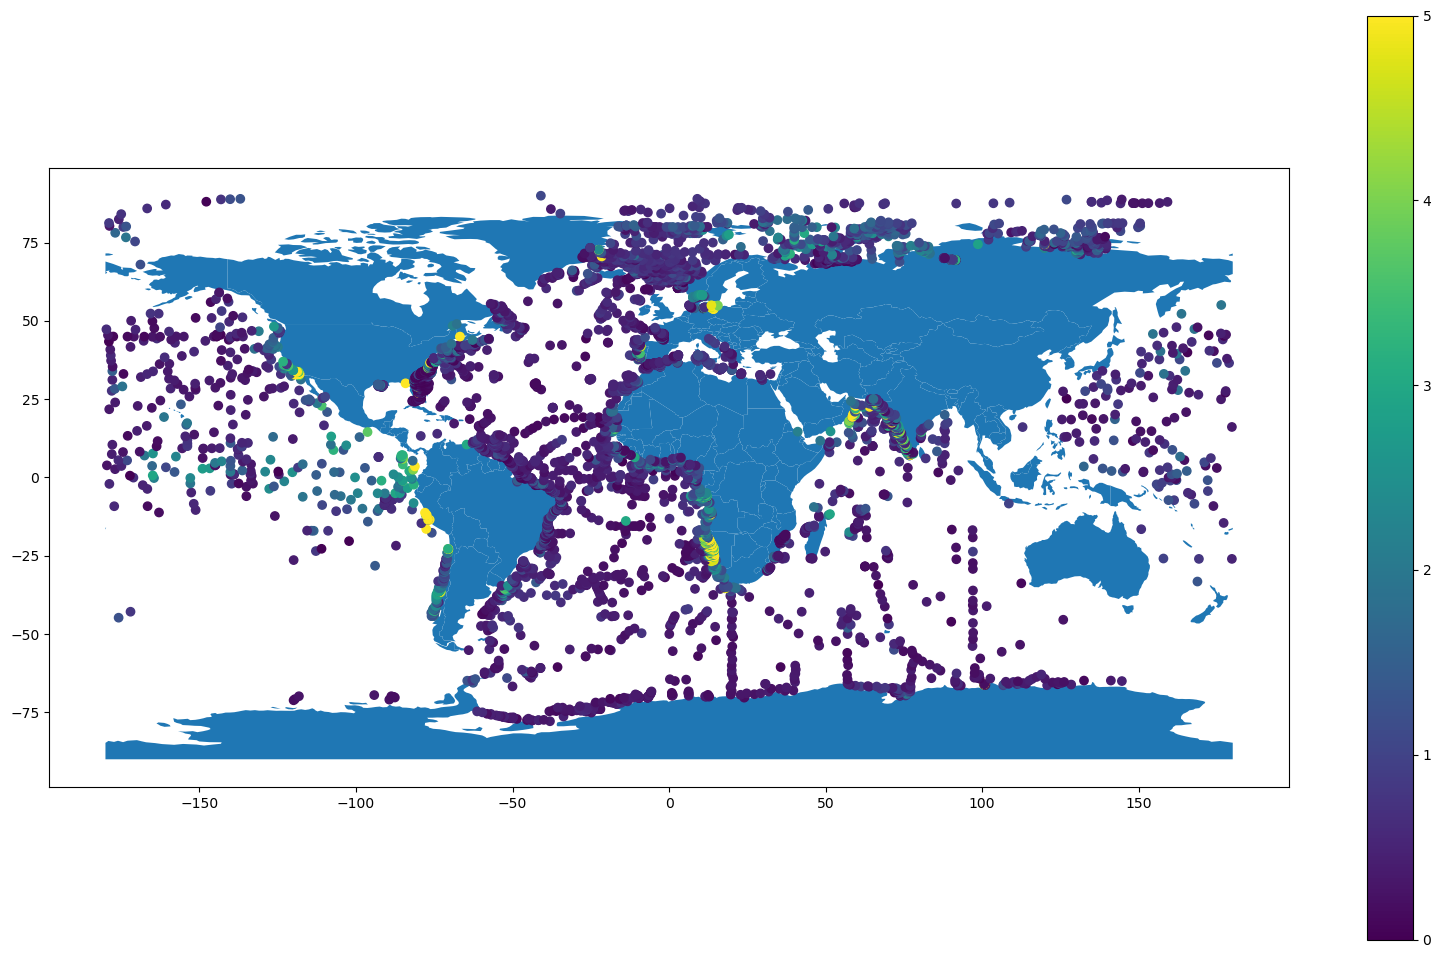

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geometry = [Point(xy) for xy in zip(df_1['Longitude'], df_1['Latitude'])]
gdf_1 = GeoDataFrame(df_1, geometry=geometry)  
gdf_1.plot(ax = world.plot(figsize = (20, 12)), column = df_1["TOC [%]"], vmin = 0, vmax = 5,legend = True);

df_1.describe()

In [8]:
toc_labels_file2 = 'CASCADEsurfsed_v2.xlsx'
df_2 = pd.read_excel(Path(data_path / toc_labels_file2))

In [9]:
df_2

ID     STATION        LAT         LON  MEANDEPTH (cm)  \
0        1  HLY0501-05  72.694200 -157.517700             1.0   
1        2  HLY0501-05  72.694200 -157.517700             8.0   
2        3  HLY0501-05  72.694200 -157.517700            12.0   
3        4  HLY0501-05  72.694200 -157.517700            20.0   
4        5  HLY0501-05  72.694200 -157.517700            28.0   
...    ...         ...        ...         ...             ...   
8424  8425         NaN  28.502390  -86.080937             NaN   
8425  8426         NaN  28.749993  -85.747703             NaN   
8426  8427         NaN  24.997988  -92.012963             NaN   
8427  8428         NaN  24.244522  -85.471213             NaN   
8428  8429         NaN  26.276302  -93.362182             NaN   

      WATERDEPTH (mbsl) EXPEDITION    YEAR  OC (%)  TN (%)  ...  d13C (‰)  \
0                 415.0      Healy  2005.0    1.38    0.19  ...     -21.7   
1                 415.0      Healy  2005.0    1.68    0.23  ...     -22.5   
2                 415.0      Healy  2005.0    1.63    0.24  ...       NaN   
3                 415.0      Healy  2005.0    1.50    0.21  ...       NaN   
4                 415.0      Healy  2005.0    1.51    0.20  ...       NaN   
...                 ...        ...     ...     ...     ...  ...       ...   
8424                NaN        NaN     NaN    9.00     NaN  ...       NaN   
8425                NaN        NaN     NaN    9.10     NaN  ...       NaN   
8426                NaN        NaN     NaN    5.20     NaN  ...       NaN   
8427                NaN        NaN     NaN    2.50     NaN  ...       NaN   
8428                NaN        NaN     NaN    4.50     NaN  ...       NaN   

      D14C (‰)                                        CN_CITATION  \
0          NaN  Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
1          NaN  Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
2          NaN  Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
3          NaN  Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
4          NaN  Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
...        ...                                                ...   
8424       NaN                                                NaN   
8425       NaN                                                NaN   
8426       NaN                                                NaN   
8427       NaN                                                NaN   
8428       NaN                                                NaN   

                                          d13C_CITATION D14C_CITATION SAMPLER  \
0     Faux, J. F., Belicka, L. L. and Rodger Harvey,...           NaN     JPC   
1     Faux, J. F., Belicka, L. L. and Rodger Harvey,...           NaN     JPC   
2                                                   NaN           NaN     JPC   
3                                                   NaN           NaN     JPC   
4                                                   NaN           NaN     JPC   
...                                                 ...           ...     ...   
8424                                                NaN           NaN     NaN   
8425                                                NaN           NaN     NaN   
8426                                                NaN           NaN     NaN   
8427                                                NaN           NaN     NaN   
8428                                                NaN           NaN     NaN   

     STORAGE  CN_METHOD d13C_METHOD D14C_LABEL  
0        1.0  Exeter EA     EA-IRMS        NaN  
1        1.0  Exeter EA     EA-IRMS        NaN  
2        1.0  Exeter EA         NaN        NaN  
3        1.0  Exeter EA         NaN        NaN  
4        1.0  Exeter EA         NaN        NaN  
...      ...        ...         ...        ...  
8424     NaN        NaN         NaN        NaN  
8425     NaN        NaN         NaN        NaN  
8426     NaN        NaN         NaN        NaN  
8427     N

In [10]:
df_2 = df_2[df_2["MEANDEPTH (cm)"]<=10]

In [11]:
df_2

ID     STATION      LAT       LON  MEANDEPTH (cm)  WATERDEPTH (mbsl)  \
0        1  HLY0501-05  72.6942 -157.5177             1.0              415.0   
1        2  HLY0501-05  72.6942 -157.5177             8.0              415.0   
64      65    PS2725-5  78.6560  144.1350             0.0               77.0   
65      66    PS2725-5  78.6560  144.1350            10.0               77.0   
112    113    PS2476-3  77.3917  118.1917             0.0              524.0   
...    ...         ...      ...       ...             ...                ...   
8174  8175    PS2187-5  88.7348  126.9133             9.0             3819.0   
8175  8176    PS2187-5  88.7348  126.9133            10.0             3819.0   
8237  8238      PG2303  69.5131 -138.8950             0.0               38.0   
8252  8253      31-PC1  79.9148  143.2335             3.0             1120.0   
8253  8254      31-PC1  79.9148  143.2335             8.0             1120.0   

                   EXPEDITION    YEAR  OC (%)  TN (%)  ...  d13C (‰)  \
0                       Healy  2005.0    1.38    0.19  ...     -21.7   
1                       Healy  2005.0    1.68    0.23  ...     -22.5   
64    Polarstern 36, ARK-XI/1  1995.0    0.83    0.17  ...     -22.5   
65    Polarstern 36, ARK-XI/1  1995.0    0.91    0.16  ...     -23.1   
112   Polarstern 27, ARK-IX/4  1993.0    1.10    0.15  ...       NaN   
...                       ...     ...     ...     ...  ...       ...   
8174            Polarstern 19  1991.0    0.86    0.12  ...       NaN   
8175            Polarstern 19  1991.0    0.84    0.12  ...       NaN   
8237                      NaN  2016.0    1.30     NaN  ...     -26.2   
8252          Oden, SWERUS-C3  2014.0    0.99    0.15  ...     -22.6   
8253          Oden, SWERUS-C3  2014.0    0.86    0.13  ...     -22.6   

      D14C (‰)                                        CN_CITATION  \
0          NaN  Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
1          NaN  Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
64         NaN  Fahl, K. and Stein, R.: Biomarkers as organic-...   
65         NaN  Fahl, K. and Stein, R.: Biomarkers as organic-...   
112        NaN  Stein, R., Fahl, K., Niessen, F. and Siebold, ...   
...        ...                                                ...   
8174       NaN  Schubert, C. J.: Organischer Kohlenstoff in sp...   
8175       NaN  Schubert, C. J.: Organischer Kohlenstoff in sp...   
8237    -825.0  Grotheer, H., Meyer, V., Riedel, T., Pfalz, G....   
8252       NaN  Muschitiello, F., O’Regan, M., Martens, J., We...   
8253    -611.3  Muschitiello, F., O’Regan, M., Martens, J., We...   

                                          d13C_CITATION  \
0     Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
1     Faux, J. F., Belicka, L. L. and Rodger Harvey,...   
64    Mueller-Lupp, T., Bauch, H. A., Erlenkeuser, H...   
65    Mueller-Lupp, T., Bauch, H. A., Erlenkeuser, H...   
112                                                 NaN   
...                                                 ...   
8174                                                NaN   
8175                                                NaN   
8237  Grotheer, H., Meyer, V., Riedel, T., Pfalz, G....   
8252  Martens, J., Wild, B., Muschitiello, F., O’Reg...   
8253  Martens, J., Wild, B., Muschitiello, F., O’Reg...   

                                          D14C_CITATION  \
0                                                   NaN   
1                                                   NaN   
64                                                  NaN   
65                                                  NaN   
112                                                 NaN   
...                                                 ...   
8174                                                NaN   
8175                                                NaN   
8237  Grotheer, H., Meyer, V., Riedel, T., Pfalz, G....   
8252  Martens, J., Wild, B., Muschitiello, F., O’Reg..

In [12]:
df_2 = df_2.rename(columns={"LAT": "Latitude", "LON": "Longitude","OC (%)":"TOC [%]"})

df_2 = df_2[["Latitude", "Longitude", "TOC [%]"]]
df_2 = df_2.dropna(how="any")

In [13]:
import pandas as pd

# Group by Latitude and Longitude and filter groups with more than one entry
df_2 = df_2.groupby(['Latitude', 'Longitude']).filter(lambda x: len(x) > 0)

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_2)

# Group the data by Latitude and Longitude and calculate the mean of each group
df_2 = df_2.groupby(['Latitude', 'Longitude'], as_index=False).mean()

# Display the resulting DataFrame with averaged locations
print("DataFrame after averaging:")
print(df_2)

Filtered DataFrame:
      Latitude  Longitude  TOC [%]
0      72.6942  -157.5177     1.38
1      72.6942  -157.5177     1.68
64     78.6560   144.1350     0.83
65     78.6560   144.1350     0.91
112    77.3917   118.1917     1.10
...        ...        ...      ...
8174   88.7348   126.9133     0.86
8175   88.7348   126.9133     0.84
8237   69.5131  -138.8950     1.30
8252   79.9148   143.2335     0.99
8253   79.9148   143.2335     0.86

[588 rows x 3 columns]
DataFrame after averaging:
     Latitude  Longitude   TOC [%]
0     66.1667  -168.3833  0.240000
1     66.5850  -174.4217  0.610000
2     66.7063  -174.1092  1.315000
3     68.7333  -170.0000  1.795000
4     68.8202    73.5853  0.960000
..        ...        ...       ...
174   87.7652   108.7495  0.681818
175   88.0050   159.1675  0.364000
176   88.0360   134.9255  0.495000
177   88.7348   126.9133  0.959091
178   90.0000     0.0000  0.910000

[179 rows x 3 columns]


/tmp/ipykernel_1190542/1648979561.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Latitude   Longitude     TOC [%]
count  179.000000  179.000000  179.000000
mean    76.398834   45.019705    1.085935
std      5.448351   78.793163    0.579259
min     66.166700 -176.333300    0.040000
25%     72.469550   37.502500    0.671500
50%     75.501000   62.490000    1.020000
75%     79.915650   81.480400    1.322500
max     90.000000  178.958300    3.190000

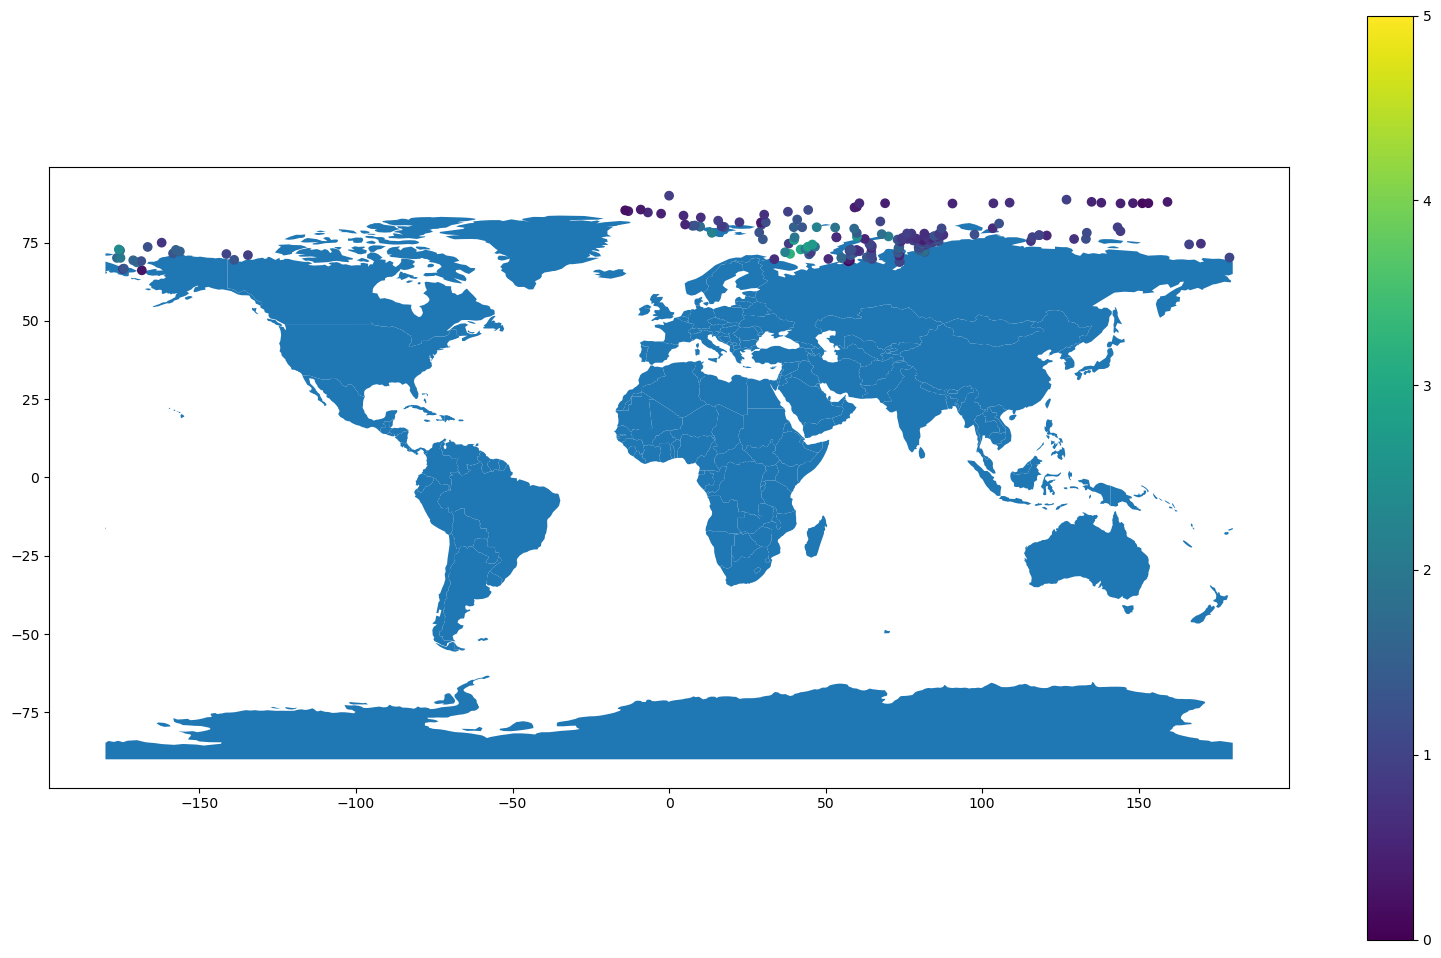

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

geometry = [Point(xy) for xy in zip(df_2['Longitude'], df_2['Latitude'])]
gdf_2 = GeoDataFrame(df_2, geometry=geometry)   
gdf_2.plot(ax=world.plot(figsize = (20, 12)), column = df_2["TOC [%]"], vmin = 0, vmax = 5,legend = True)
df_2.describe()

In [15]:
df_2

Latitude  Longitude   TOC [%]
0     66.1667  -168.3833  0.240000
1     66.5850  -174.4217  0.610000
2     66.7063  -174.1092  1.315000
3     68.7333  -170.0000  1.795000
4     68.8202    73.5853  0.960000
..        ...        ...       ...
174   87.7652   108.7495  0.681818
175   88.0050   159.1675  0.364000
176   88.0360   134.9255  0.495000
177   88.7348   126.9133  0.959091
178   90.0000     0.0000  0.910000

[179 rows x 3 columns]

In [16]:
toc_labels_file4 = 'HayesTOCData.xlsx'
df_4 = pd.read_excel(Path(data_path / toc_labels_file4))

In [17]:
df_4

latitude   longitude  Core_Depth    Age Station  Water_Depth  CaCO3  \
0      20.860000  116.040000        0.01 -999.0       4        280.0 -999.0   
1      20.860000  116.940000        0.01 -999.0       7        209.0 -999.0   
2      20.860000  117.840000        0.01 -999.0      10       1290.0 -999.0   
3      24.500000  -64.783300     -999.00 -999.0      14       5949.0    3.0   
4      20.560000  116.040000        0.01 -999.0      16        452.0 -999.0   
...          ...         ...         ...    ...     ...          ...    ...   
12754  26.276302  -93.362182        0.02 -999.0      W5       2740.0   29.0   
12755  27.001487  -87.988230        0.02 -999.0  MT6(a)       2750.0   32.0   
12756  26.000237  -94.498968        0.02 -999.0     RW6       3015.0   26.0   
12757  24.244522  -85.471213        0.02 -999.0      S4       3408.0   16.0   
12758  24.997988  -92.012963        0.02 -999.0      S1       3527.0   39.0   

         Opal     TOC          Fe  ...     Ti  Ba_xs    K2O     Zr     Hg  \
0        1.83 -999.00 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
1        0.58 -999.00 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
2        0.90 -999.00 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
3     -999.00 -999.00    5.455519  ... -999.0 -999.0 -999.0 -999.0 -999.0   
4        1.37 -999.00 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
...       ...     ...         ...  ...    ...    ...    ...    ...    ...   
12754 -999.00    0.94 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12755 -999.00    0.37 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12756 -999.00    0.72 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12757 -999.00    0.55 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12758 -999.00    0.49 -999.000000  ... -999.0 -999.0 -999.0 -999.0 -999.0   

        Mass_Flux                       Reference  \
0     -999.000000                Wang & Li (2009)   
1     -999.000000                Wang & Li (2009)   
2        4.577832                Wang & Li (2009)   
3        3.753242  Chester & Messiha-Hanna (1970)   
4     -999.000000                Wang & Li (2009)   
...           ...                             ...   
12754 -999.000000                  Beazley (2003)   
12755 -999.000000                  Beazley (2003)   
12756 -999.000000                  Beazley (2003)   
12757 -999.000000                  Beazley (2003)   
12758 -999.000000                  Beazley (2003)   

                                    Manuscript_Link  \
0          http://doi.org/10.1007/978-1-4020-9745-4   
1          http://doi.org/10.1007/978-1-4020-9745-4   
2          http://doi.org/10.1007/978-1-4020-9745-4   
3      https://doi.org/10.1016/0016-7037(70)90166-3   
4          http://doi.org/10.1007/978-1-4020-9745-4   
...                                             ...   
12754              http://hdl.handle.net/1969.1/534   
12755              http://hdl.handle.net/1969.1/534   
12756              http://hdl.handle.net/1969.1/534   
12757              http://hdl.handle.net/1969.1/534   
12758              http://hdl.handle.net/1969.1/534   

                                               Data_Link Opal_Method  
0      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
1      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
2      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
3           https://doi.org/10.1016/0016-7037(70)90166-3        -999  
4      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
...                                                  ...         ...  
12754                   http://hdl.handle.net/1969.1/534        -999  
12755                   http://hdl.handle.net/1969.1/534        -999  
12756                   http://hdl.handle.net/1969.1/534        -999  
12757                   http://hdl.handle.net/1969.1/534        -999  
12758                   http://hdl.handle.net/1969.1/53

In [18]:
df_4 = df_4[df_4["Core_Depth"]<=0.1]
df_4 = df_4[df_4["Core_Depth"]>=-0.1] #to exclude -999.0

In [19]:
df_4

latitude   longitude  Core_Depth    Age Station  Water_Depth  CaCO3  \
0      20.860000  116.040000        0.01 -999.0       4        280.0 -999.0   
1      20.860000  116.940000        0.01 -999.0       7        209.0 -999.0   
2      20.860000  117.840000        0.01 -999.0      10       1290.0 -999.0   
4      20.560000  116.040000        0.01 -999.0      16        452.0 -999.0   
5      20.280000  116.040000        0.01 -999.0      29        716.0 -999.0   
...          ...         ...         ...    ...     ...          ...    ...   
12754  26.276302  -93.362182        0.02 -999.0      W5       2740.0   29.0   
12755  27.001487  -87.988230        0.02 -999.0  MT6(a)       2750.0   32.0   
12756  26.000237  -94.498968        0.02 -999.0     RW6       3015.0   26.0   
12757  24.244522  -85.471213        0.02 -999.0      S4       3408.0   16.0   
12758  24.997988  -92.012963        0.02 -999.0      S1       3527.0   39.0   

         Opal     TOC     Fe  ...     Ti  Ba_xs    K2O     Zr     Hg  \
0        1.83 -999.00 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
1        0.58 -999.00 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
2        0.90 -999.00 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
4        1.37 -999.00 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
5        1.19 -999.00 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
...       ...     ...    ...  ...    ...    ...    ...    ...    ...   
12754 -999.00    0.94 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12755 -999.00    0.37 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12756 -999.00    0.72 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12757 -999.00    0.55 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
12758 -999.00    0.49 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   

        Mass_Flux         Reference                           Manuscript_Link  \
0     -999.000000  Wang & Li (2009)  http://doi.org/10.1007/978-1-4020-9745-4   
1     -999.000000  Wang & Li (2009)  http://doi.org/10.1007/978-1-4020-9745-4   
2        4.577832  Wang & Li (2009)  http://doi.org/10.1007/978-1-4020-9745-4   
4     -999.000000  Wang & Li (2009)  http://doi.org/10.1007/978-1-4020-9745-4   
5     -999.000000  Wang & Li (2009)  http://doi.org/10.1007/978-1-4020-9745-4   
...           ...               ...                                       ...   
12754 -999.000000    Beazley (2003)          http://hdl.handle.net/1969.1/534   
12755 -999.000000    Beazley (2003)          http://hdl.handle.net/1969.1/534   
12756 -999.000000    Beazley (2003)          http://hdl.handle.net/1969.1/534   
12757 -999.000000    Beazley (2003)          http://hdl.handle.net/1969.1/534   
12758 -999.000000    Beazley (2003)          http://hdl.handle.net/1969.1/534   

                                               Data_Link Opal_Method  
0      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
1      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
2      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
4      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
5      https://ars.els-cdn.com/content/image/1-s2.0-S...        MF89  
...                                                  ...         ...  
12754                   http://hdl.handle.net/1969.1/534        -999  
12755                   http://hdl.handle.net/1969.1/534        -999  
12756                   http://hdl.handle.net/1969.1/534        -999  
12757                   http://hdl.handle.net/1969.1/534        -999  
12758                   http://hdl.handle.net/1969.1/534        -999  

[12078 rows x 22 columns]

In [20]:
df_4 = df_4.rename(columns={"latitude": "Latitude", "longitude": "Longitude","TOC":"TOC [%]"})
df_4 = df_4[["Latitude", "Longitude", "TOC [%]"]]
df_4 = df_4.dropna(how="any")
df_4 = df_4[df_4.ne(-999).all(axis=1)]

In [21]:
import pandas as pd

# Group by Latitude and Longitude and filter groups with more than one entry
df_4 = df_4.groupby(['Latitude', 'Longitude']).filter(lambda x: len(x) > 0)

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_4)

# Group the data by Latitude and Longitude and calculate the mean of each group
df_4 = df_4.groupby(['Latitude', 'Longitude'], as_index=False).mean()

# Display the resulting DataFrame with averaged locations
print("DataFrame after averaging:")
print(df_4)

Filtered DataFrame:
        Latitude  Longitude  TOC [%]
119    36.160000  20.480000    0.200
126     0.107300 -23.227500    0.200
133    16.621800  59.795300    1.067
141     1.954800 -22.783000    0.380
148     0.006700 -22.996800    0.580
...          ...        ...      ...
12754  26.276302 -93.362182    0.940
12755  27.001487 -87.988230    0.370
12756  26.000237 -94.498968    0.720
12757  24.244522 -85.471213    0.550
12758  24.997988 -92.012963    0.490

[6306 rows x 3 columns]
DataFrame after averaging:
      Latitude  Longitude  TOC [%]
0     -77.8475   -38.0462     0.39
1     -77.5843   -43.7180     0.36
2     -77.5650   -43.7033     0.28
3     -77.5192   -41.7250     0.40
4     -77.5183   -41.7467     0.47
...        ...        ...      ...
6237   88.8000  -143.1170     0.73
6238   88.8667  -140.1830     1.16
6239   88.9833  -136.9330     1.28
6240   88.9938     9.0122     0.73
6241   89.9833   -40.9500     1.08

[6242 rows x 3 columns]


Latitude    Longitude      TOC [%]
count  6242.000000  6242.000000  6242.000000
mean     20.379435    -5.739983     1.066876
std      40.471402    73.459357     1.498143
min     -77.847500  -179.850000     0.000000
25%      -6.282850   -55.014575     0.350000
50%      27.460850    -6.891650     0.630000
75%      49.189425    36.186225     1.220000
max      89.983300   179.850000    22.300000

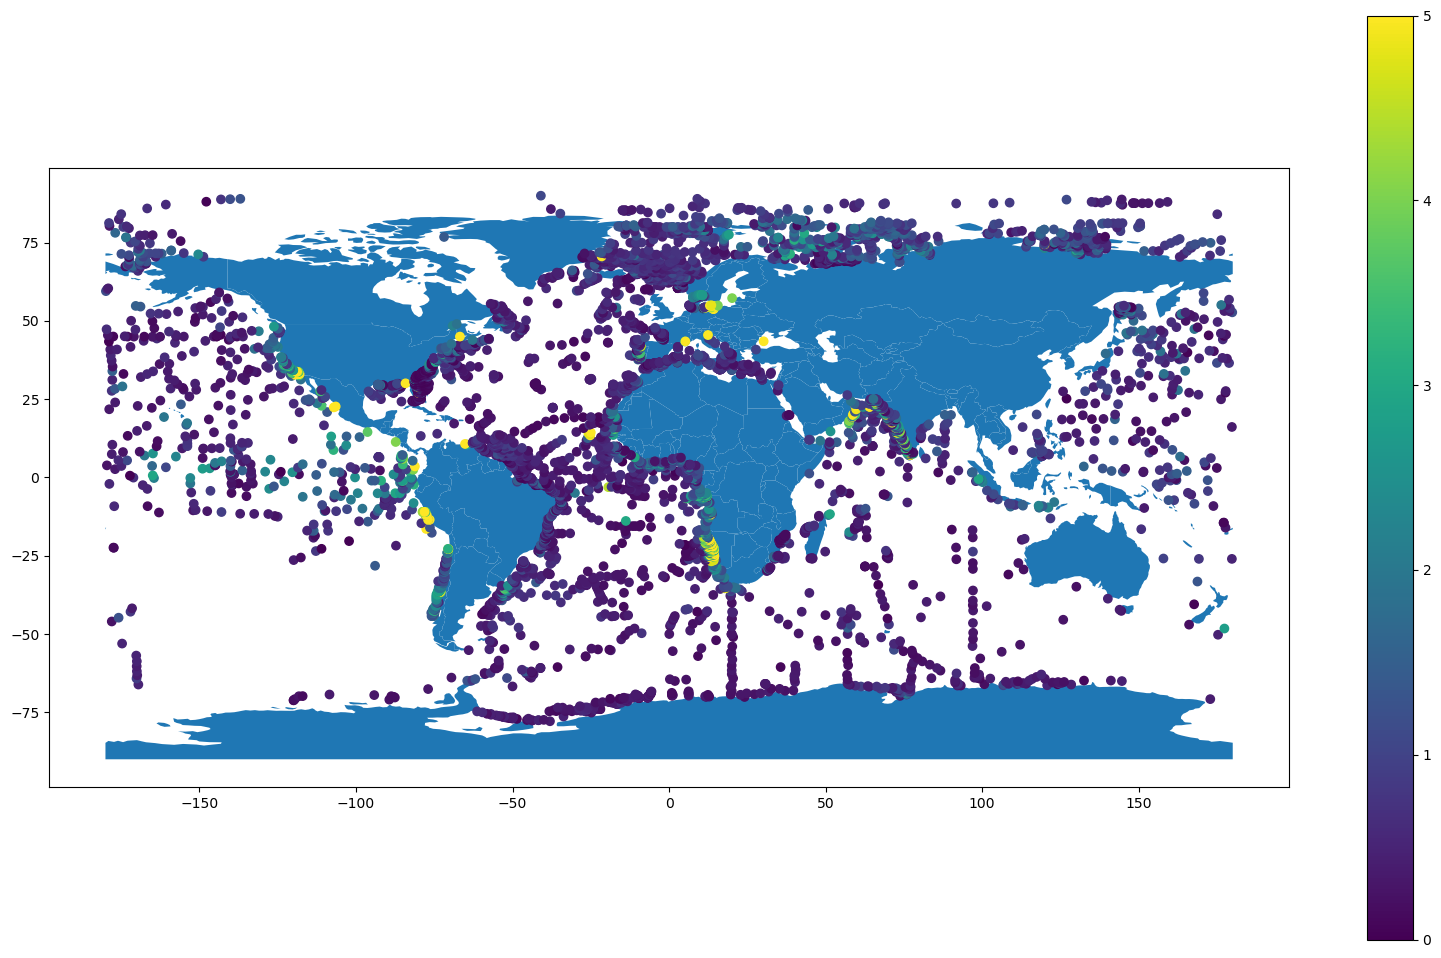

In [22]:


geometry = [Point(xy) for xy in zip(df_4['Longitude'], df_4['Latitude'])]
gdf_4 = GeoDataFrame(df_4, geometry=geometry)   
gdf_4.plot(ax=world.plot(figsize = (20, 12)), column = df_4["TOC [%]"], vmin = 0, vmax = 5,legend = True)

df_4.describe()

In [23]:
min(df_4["TOC [%]"])

0.0

In [24]:
"""
# Assuming df_1 and df_2 are your DataFrames
df_merged = pd.merge(df_1, df_4, how='outer', indicator=True)

# Select rows that are in df_1 but not in df_2
rows_only_in_df_1 = df_merged[df_merged['_merge'] == 'left_only'][df_4.columns]

# Create a new DataFrame
df_5= pd.DataFrame(rows_only_in_df_1)

# Display or use df_1_not_in_df_2 as needed
print(df_5)

geometry = [Point(xy) for xy in zip(df_5['Longitude'], df_5['Latitude'])]
gdf_5 = GeoDataFrame(df_5, geometry=geometry)   
gdf_5.plot(ax=world.plot(figsize = (20, 12)), column = df_5["TOC [%]"], vmin = 0, vmax = 5,legend = True)

df_5.describe()
"""

'\n# Assuming df_1 and df_2 are your DataFrames\ndf_merged = pd.merge(df_1, df_4, how=\'outer\', indicator=True)\n\n# Select rows that are in df_1 but not in df_2\nrows_only_in_df_1 = df_merged[df_merged[\'_merge\'] == \'left_only\'][df_4.columns]\n\n# Create a new DataFrame\ndf_5= pd.DataFrame(rows_only_in_df_1)\n\n# Display or use df_1_not_in_df_2 as needed\nprint(df_5)\n\ngeometry = [Point(xy) for xy in zip(df_5[\'Longitude\'], df_5[\'Latitude\'])]\ngdf_5 = GeoDataFrame(df_5, geometry=geometry)   \ngdf_5.plot(ax=world.plot(figsize = (20, 12)), column = df_5["TOC [%]"], vmin = 0, vmax = 5,legend = True)\n\ndf_5.describe()\n'

In [25]:
toc_labels_file3 = 'Lahijani_Caspian_Sea_POC.xlsx'
df_3 = pd.read_excel(Path(data_path / toc_labels_file3))

In [26]:
df_3

Lat        Lon  TOC wt.%
0   37.582833  49.338333       4.0
1   37.560000  49.422667       0.5
2   37.522833  49.480833       3.5
3   37.642000  49.381000       4.6
4   37.736833  49.366833       6.0
5   37.602667  49.434833       2.5
6   37.600500  49.458333       3.2
7   37.604500  49.436000       3.0
8   37.532333  49.690500       3.8
9   37.572333  49.519500       4.0
10  37.526000  49.687667       3.8
11  37.526167  49.843500       7.4
12  37.700167  49.426833       3.5
13  37.627500  49.482500       5.1
14  37.590500  49.541833       5.0
15  37.570667  49.542167       1.2
16  37.581833  49.555167       3.0
17  37.541000  49.770667       2.5
18  37.591167  49.571167       2.5
19  37.609333  49.593167       2.4
20  37.564333  49.773500       2.8
21  37.574333  49.774333       2.5
22  37.134667  50.300167       3.0
23  37.061000  50.329167       0.5
24  37.164667  50.372167       1.8
25  37.163500  50.337667       1.2
26  37.028833  50.421833       2.2
27  37.021667  50.373333       2.0
28  37.052167  50.470333       4.0
29  36.823333  51.125667       2.5
30  36.789333  51.224333       2.4
31  36.751833  51.309333       1.4
32  36.717167  51.539000       2.1
33  36.852167  51.125333       3.2
34  36.772667  51.324833       3.1
35  36.756333  51.543000       3.8
36  36.742500  52.651167       1.8
37  36.758833  52.701000       3.8
38  36.737000  52.800000       2.0
39  36.740833  52.538000       1.8
40  36.825167  52.659167       3.8
41  36.855833  52.687167       2.5
42  36.773500  52.550667       3.2
43  36.884167  52.558333       3.7

In [27]:
df_3 = df_3.dropna(how="any")
df_3 = df_3.rename(columns={"Lat": "Latitude", "Lon": "Longitude","TOC wt.%":"TOC [%]"})

In [28]:
import pandas as pd

# Group by Latitude and Longitude and filter groups with more than one entry
df_3 = df_3.groupby(['Latitude', 'Longitude']).filter(lambda x: len(x) > 0)

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_3)

# Group the data by Latitude and Longitude and calculate the mean of each group
df_3 = df_3.groupby(['Latitude', 'Longitude'], as_index=False).mean()

# Display the resulting DataFrame with averaged locations
print("DataFrame after averaging:")
print(df_3)

Filtered DataFrame:
     Latitude  Longitude  TOC [%]
0   37.582833  49.338333      4.0
1   37.560000  49.422667      0.5
2   37.522833  49.480833      3.5
3   37.642000  49.381000      4.6
4   37.736833  49.366833      6.0
5   37.602667  49.434833      2.5
6   37.600500  49.458333      3.2
7   37.604500  49.436000      3.0
8   37.532333  49.690500      3.8
9   37.572333  49.519500      4.0
10  37.526000  49.687667      3.8
11  37.526167  49.843500      7.4
12  37.700167  49.426833      3.5
13  37.627500  49.482500      5.1
14  37.590500  49.541833      5.0
15  37.570667  49.542167      1.2
16  37.581833  49.555167      3.0
17  37.541000  49.770667      2.5
18  37.591167  49.571167      2.5
19  37.609333  49.593167      2.4
20  37.564333  49.773500      2.8
21  37.574333  49.774333      2.5
22  37.134667  50.300167      3.0
23  37.061000  50.329167      0.5
24  37.164667  50.372167      1.8
25  37.163500  50.337667      1.2
26  37.028833  50.421833      2.2
27  37.021667  50.373333    

Latitude  Longitude    TOC [%]
count  44.000000  44.000000  44.000000
mean   37.235614  50.523477   3.013636
std     0.375350   1.201303   1.348658
min    36.717167  49.338333   0.500000
25%    36.824708  49.536250   2.175000
50%    37.343750  50.071833   3.000000
75%    37.582083  51.313208   3.800000
max    37.736833  52.800000   7.400000

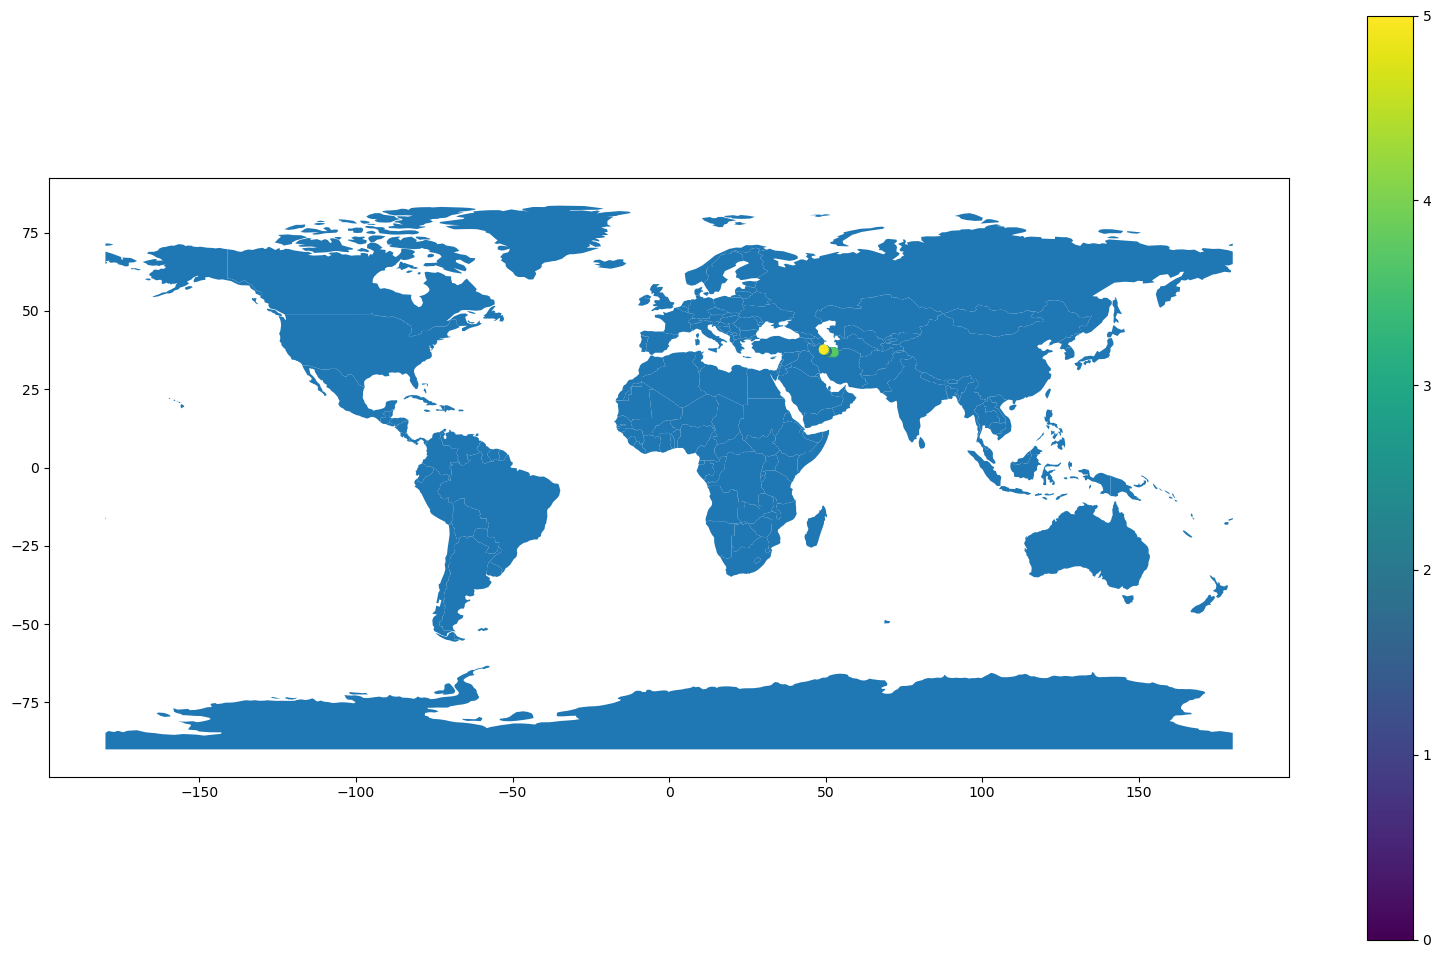

In [29]:
geometry = [Point(xy) for xy in zip(df_3['Longitude'], df_3['Latitude'])]
gdf_3 = GeoDataFrame(df_3, geometry=geometry)   
gdf_3.plot(ax=world.plot(figsize = (20, 12)), column = df_3["TOC [%]"], vmin = 0, vmax = 5,legend = True)

df_3.describe()

In [36]:
toc_labels_file5 = 'all_data.xlsx'
df_5 = pd.read_excel((Path(data_path / toc_labels_file5)))

In [37]:
df_5

core_id  core_name   latitude   longitude  water_depth_m  sampling_date  \
0        6426  Dabob Bay  47.792494 -122.798680          110.0   3.786912e+11   
1        6426  Dabob Bay  47.792494 -122.798680          110.0   3.786912e+11   
2        6426  Dabob Bay  47.792494 -122.798680          110.0   3.786912e+11   
3        6426  Dabob Bay  47.792494 -122.798680          110.0   3.786912e+11   
4        6426  Dabob Bay  47.792494 -122.798680          110.0   3.786912e+11   
...       ...        ...        ...         ...            ...            ...   
20322   23101     223600  57.734833   20.382000          147.0            NaN   
20323   23102     223630  57.922333   20.524667          102.0            NaN   
20324   23103     223640  57.963500   20.219667          132.0            NaN   
20325   23105     223620  57.849833   21.134500           81.0            NaN   
20326   23106     223610  57.811667   21.396167           60.0            NaN   

       sampling_year  sampling_month  \
0             1982.0             1.0   
1             1982.0             1.0   
2             1982.0             1.0   
3             1982.0             1.0   
4             1982.0             1.0   
...              ...             ...   
20322         1999.0             NaN   
20323         1999.0             NaN   
20324         1999.0             NaN   
20325         1999.0             NaN   
20326         1999.0             NaN   

                                    sampling_method_type core_comment  ...  \
0      box corer (type: Flucha, Usnel, Pouliot, Sandi...          NaN  ...   
1      box corer (type: Flucha, Usnel, Pouliot, Sandi...          NaN  ...   
2      box corer (type: Flucha, Usnel, Pouliot, Sandi...          NaN  ...   
3      box corer (type: Flucha, Usnel, Pouliot, Sandi...          NaN  ...   
4      box corer (type: Flucha, Usnel, Pouliot, Sandi...          NaN  ...   
...                                                  ...          ...  ...   
20322  box corer (type: Flucha, Usnel, Pouliot, Sandi...  Gotland Sea  ...   
20323  box corer (type: Flucha, Usnel, Pouliot, Sandi...  Gotland Sea  ...   
20324  box corer (type: Flucha, Usnel, Pouliot, Sandi...  Gotland Sea  ...   
20325  box corer (type: Flucha, Usnel, Pouliot, Sandi...  Gotland Sea  ...   
20326  box corer (type: Flucha, Usnel, Pouliot, Sandi...  Gotland Sea  ...   

      total_organic_carbon_%_DOI  \
0      10.4319/lo.1992.37.4.0703   
1      10.4319/lo.1992.37.4.0703   
2      10.4319/lo.1992.37.4.0703   
3      10.4319/lo.1992.37.4.0703   
4      10.4319/lo.1992.37.4.0703   
...                          ...   
20322                        NaN   
20323                        NaN   
20324                        NaN   
20325                        NaN   
20326                        NaN   

                            total_organic_carbon_%_title  \
0      Sources and reactivities of amino acids in a c...   
1      Sources and reactivities of amino acids in a c...   
2      Sources and reactivities of amino acids in a c...   
3      Sources and reactivities of amino acids in a c...   
4      Sources and reactivities of amino acids in a c...   
...                                                  ...   
20322                      10.1016/s0016-7037(00)00603-7   
20323                      10.1016/s0016-7037(00)00603-7   
20324                      10.1016/s0016-7037(00)00603-7   
20325                      10.1016/s0016-7037(00)00603-7   
20326                      10.1016/s0016-7037(00)00603-7   

                           total_organic_carbon_%_method        sampling_day  \
0                                     elemental analyzer                 NaN   
1                                     elemental analyzer                 NaN   
2                                     elemental analyzer                 NaN   
3                                     elemental analyzer                 NaN   
4                                     elemental analyzer     

In [38]:
df_5.columns

Index(['core_id', 'core_name', 'latitude', 'longitude', 'water_depth_m',
       'sampling_date', 'sampling_year', 'sampling_month',
       'sampling_method_type', 'core_comment', 'research_vessel',
       'water_depth_source_desc', 'georeferenced_coordinates', 'sample_name',
       'sample_depth_upper_cm', 'sample_depth_bottom_cm',
       'sample_depth_average_cm', 'sample_id', 'material_analyzed',
       'replicate', 'total_organic_carbon_%', 'total_organic_carbon_%_DOI',
       'total_organic_carbon_%_title', 'total_organic_carbon_%_method',
       'sampling_day', 'geomorphological_site', 'sampling_campaign_name',
       'sampling_campaign_date_start', 'core_length_cm',
       'sampling_campaign_date_end', 'total_organic_carbon_%_error'],
      dtype='object')

In [39]:
df_5 = df_5[df_5["sample_depth_average_cm"]<=10]

In [40]:
#df_5 = df_5.dropna(how="any")
df_5 = df_5.rename(columns={"latitude": "Latitude", "longitude": "Longitude","total_organic_carbon_%":"TOC [%]"})
df_5 = df_5[["Latitude", "Longitude", "TOC [%]"]]
df_5 = df_5.dropna(how="any")

In [41]:
import pandas as pd

# Group by Latitude and Longitude and filter groups with more than one entry
df_5 = df_5.groupby(['Latitude', 'Longitude']).filter(lambda x: len(x) > 0)

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_5)

# Group the data by Latitude and Longitude and calculate the mean of each group
df_5 = df_5.groupby(['Latitude', 'Longitude'], as_index=False).mean()

# Display the resulting DataFrame with averaged locations
print("DataFrame after averaging:")
print(df_5)

Filtered DataFrame:
        Latitude   Longitude  TOC [%]
0      47.792494 -122.798680     2.78
1      47.792494 -122.798680     2.70
2      47.792494 -122.798680     2.67
3      47.792494 -122.798680     2.76
4      47.792494 -122.798680     2.76
...          ...         ...      ...
20322  57.734833   20.382000     5.50
20323  57.922333   20.524667     1.53
20324  57.963500   20.219667     3.46
20325  57.849833   21.134500     3.28
20326  57.811667   21.396167     0.37

[18908 rows x 3 columns]
DataFrame after averaging:
        Latitude   Longitude  TOC [%]
0     -77.584333  -43.718000    0.355
1     -77.565000  -43.703333    0.280
2     -77.519167  -41.725000    0.400
3     -77.518333  -41.746667    0.470
4     -77.453333  -45.385000    0.160
...          ...         ...      ...
10215  88.656500  -61.425830    0.360
10216  88.659300  -61.486700    0.610
10217  88.982670  171.625830    0.740
10218  89.976830   31.886170    0.870
10219  90.000000    0.000000    1.040

[10220 rows x 

Latitude     Longitude       TOC [%]
count  10220.000000  10220.000000  10220.000000
mean      32.386920     25.247201      1.249679
std       32.203357     80.468424      1.637510
min      -77.584333   -179.761667      0.010000
25%       16.688000    -12.868750      0.370000
50%       37.706000     10.817768      0.690000
75%       56.647325    117.650053      1.405000
max       90.000000    179.823000     28.260000

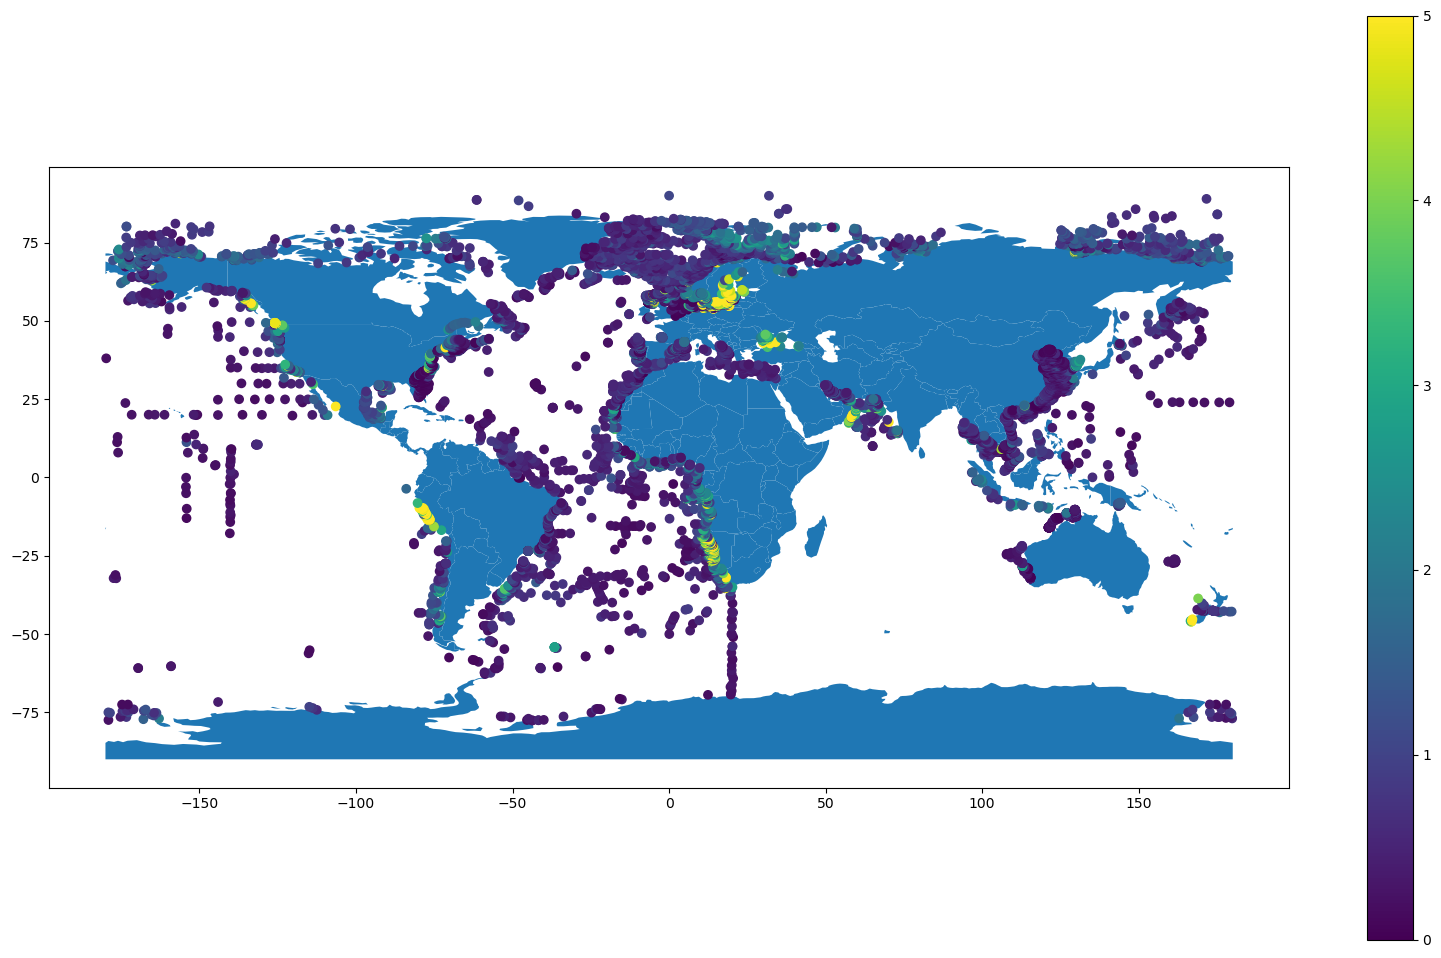

In [42]:
geometry = [Point(xy) for xy in zip(df_5['Longitude'], df_5['Latitude'])]
gdf_5 = GeoDataFrame(df_5, geometry=geometry)   
gdf_5.plot(ax=world.plot(figsize = (20, 12)), column = df_5["TOC [%]"], vmin = 0, vmax = 5, legend = True)

df_5.describe()

In [44]:
"""
 The map of weight percent TOC of North Sea surface sediments was derived from geostatistical interpolation of TOC measurements gained from more than 3000 samples collected between 1980 and 2014. The data was compiled from various national and European data centers, project databases and the literature. The compiled dataset was statistically analysed to identify local extreme values and possible methodological artifacts. Kriging with external drift (KED) was then applied to predict the weight percent TOC at unsampled locations using the percentage sediment mud content as trend variable.
1. Datasets on weight percent TOC of bulk surface sediments (< 2 cm depth) were collected from national and European data centers and the literature.
2. Data were mapped according to the specified coordinates using WGS84 geodectic datum.
3. Samples located in the Kattegat area, the Orkney and Shetland archipelagos, the Wash, the back barrier tidal flats of the Wadden Sea Islands as well as to firths, fjords and estuaries were excluded from the dataset.
4. Zero measurements were excluded from the dataset
5. Local outliers were identified based on Cook's distance from a linear regression of spatially lagged (20 km) residuals and removed from the dataset if the cumulative probability of its Cook's D value exceeded 0.50 of the F distribution.
6. Spatial replicates (samples with identical geographic coordinates) were averaged.
7. At each location,the percentage mud content was sampled using information from https://geoportal.hzg.de/geoportal/catalog/search/resource/details.page?uuid={864FC61F-5C24-4433-9651-EC078E504E6A}
8. An experimental omnidirectional variogram for log10(TOC) with log10(mud) as a trend variable was calculated using Cressie's robust variogram estimator with a cut-off distance of 400 km ) and an increasing lag width of 5 to 30 km (a total of 22 bins).
9. The semi-variogram was approximated by an exponential variogram model to define the spatial autocorrelation structure required by kriging.
10. Using log10(mud) as trend variable, kriging with external drift (KED) was applied to locally predicted the weight percent TOC on a grid with a resolution of 1 x 1 nm. Unlike with variogram calculation and model fitting, outliers were included to account for the extreme values.
11. KED performance was validated by the hold out method using 70% of the data for training and the remaining 30% for testing.
12. Desired values of weight percent TOC were calculated by taking the anti-log of the kriging estimates.
Note: All geostatistical computations were done with the R software environment (Version 3.3.2) using the “gstat” package (Pebesma, Computers & Geosciences, 30: 683-691) 
"""
toc_labels_file6 = 'TOC_entire North Sea_Hereon.dat'
# North sea data
data = np.loadtxt((Path(data_path / toc_labels_file6)))
# Convert NumPy array to a Pandas DataFrame
df_6 = pd.DataFrame(data, columns=['Longitude', 'Latitude', 'TOC [%]'])

In [45]:
df_6

Longitude  Latitude  TOC [%]
0        1.65088  50.92456  0.17347
1        1.68070  50.92456  0.19793
2        1.71053  50.92456  0.12345
3        1.74035  50.92456  0.09763
4        1.62105  50.95439  0.09729
...          ...       ...      ...
86845    4.36491  60.97544  0.57236
86846    4.39474  60.97544  0.40310
86847    4.42456  60.97544  0.64165
86848    4.45439  60.97544  0.71501
86849    4.48421  60.97544  0.37551

[86850 rows x 3 columns]

In [46]:
df_6 = df_6.dropna(how="any")

geometry = [Point(xy) for xy in zip(df_6['Longitude'], df_6['Latitude'])]

In [47]:
import pandas as pd

# Group by Latitude and Longitude and filter groups with more than one entry
df_6 = df_6.groupby(['Latitude', 'Longitude']).filter(lambda x: len(x) > 0)

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_6)

# Group the data by Latitude and Longitude and calculate the mean of each group
df_6 = df_6.groupby(['Latitude', 'Longitude'], as_index=False).mean()

# Display the resulting DataFrame with averaged locations
print("DataFrame after averaging:")
print(df_6)

Filtered DataFrame:
       Longitude  Latitude  TOC [%]
0        1.65088  50.92456  0.17347
1        1.68070  50.92456  0.19793
2        1.71053  50.92456  0.12345
3        1.74035  50.92456  0.09763
4        1.62105  50.95439  0.09729
...          ...       ...      ...
86845    4.36491  60.97544  0.57236
86846    4.39474  60.97544  0.40310
86847    4.42456  60.97544  0.64165
86848    4.45439  60.97544  0.71501
86849    4.48421  60.97544  0.37551

[86850 rows x 3 columns]
DataFrame after averaging:
       Latitude  Longitude  TOC [%]
0      50.92456    1.65088  0.17347
1      50.92456    1.68070  0.19793
2      50.92456    1.71053  0.12345
3      50.92456    1.74035  0.09763
4      50.95439    1.62105  0.09729
...         ...        ...      ...
86845  60.97544    4.36491  0.57236
86846  60.97544    4.39474  0.40310
86847  60.97544    4.42456  0.64165
86848  60.97544    4.45439  0.71501
86849  60.97544    4.48421  0.37551

[86850 rows x 3 columns]


Latitude     Longitude       TOC [%]
count  86850.000000  86850.000000  86850.000000
mean      56.591048      3.041346      0.403983
std        2.293620      3.072765      0.512151
min       50.924560     -3.896490      0.006890
25%       54.861400      0.756140      0.110790
50%       56.740350      2.814040      0.208010
75%       58.291230      4.991230      0.426390
max       60.975440     11.492980      3.474280

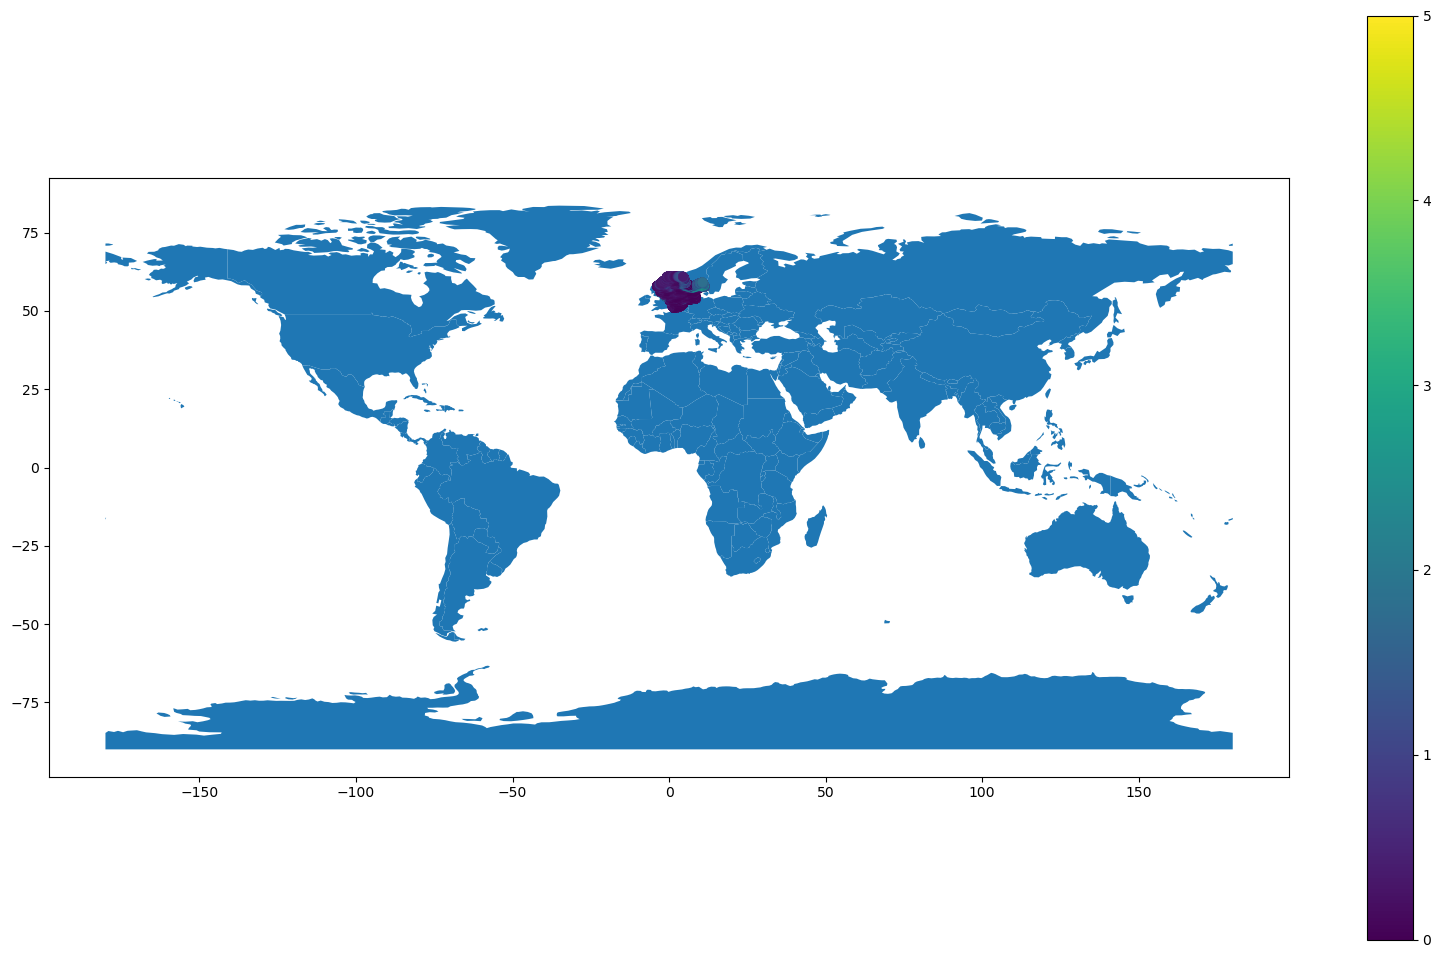

In [48]:
gdf_6 = GeoDataFrame(df_6, geometry=geometry)   
gdf_6.plot(ax=world.plot(figsize = (20, 12)), column = df_6["TOC [%]"], vmin = 0, vmax = 5, legend = True)

df_6.describe()

In [49]:
df = pd.concat([df_1,df_2,df_3,df_4, df_5, df_6])
df.describe()

Latitude      Longitude        TOC [%]
count  109075.000000  109075.000000  109075.000000
mean       50.348209       4.200862       0.556975
std        21.099935      35.015309       0.896390
min       -77.847500    -179.850000       0.000000
25%        53.847370       0.129820       0.127515
50%        56.263160       2.814040       0.260180
75%        58.231580       5.796490       0.600000
max        90.000000     179.850000      28.260000

In [50]:
df

Latitude  Longitude  TOC [%]
0     -77.84750  -38.04620  0.39000
1     -77.58430  -43.71800  0.36000
2     -77.56500  -43.70330  0.28000
3     -77.51920  -41.72500  0.40000
4     -77.51830  -41.74670  0.47000
...         ...        ...      ...
86845  60.97544    4.36491  0.57236
86846  60.97544    4.39474  0.40310
86847  60.97544    4.42456  0.64165
86848  60.97544    4.45439  0.71501
86849  60.97544    4.48421  0.37551

[109075 rows x 3 columns]

/tmp/ipykernel_1190542/80996964.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


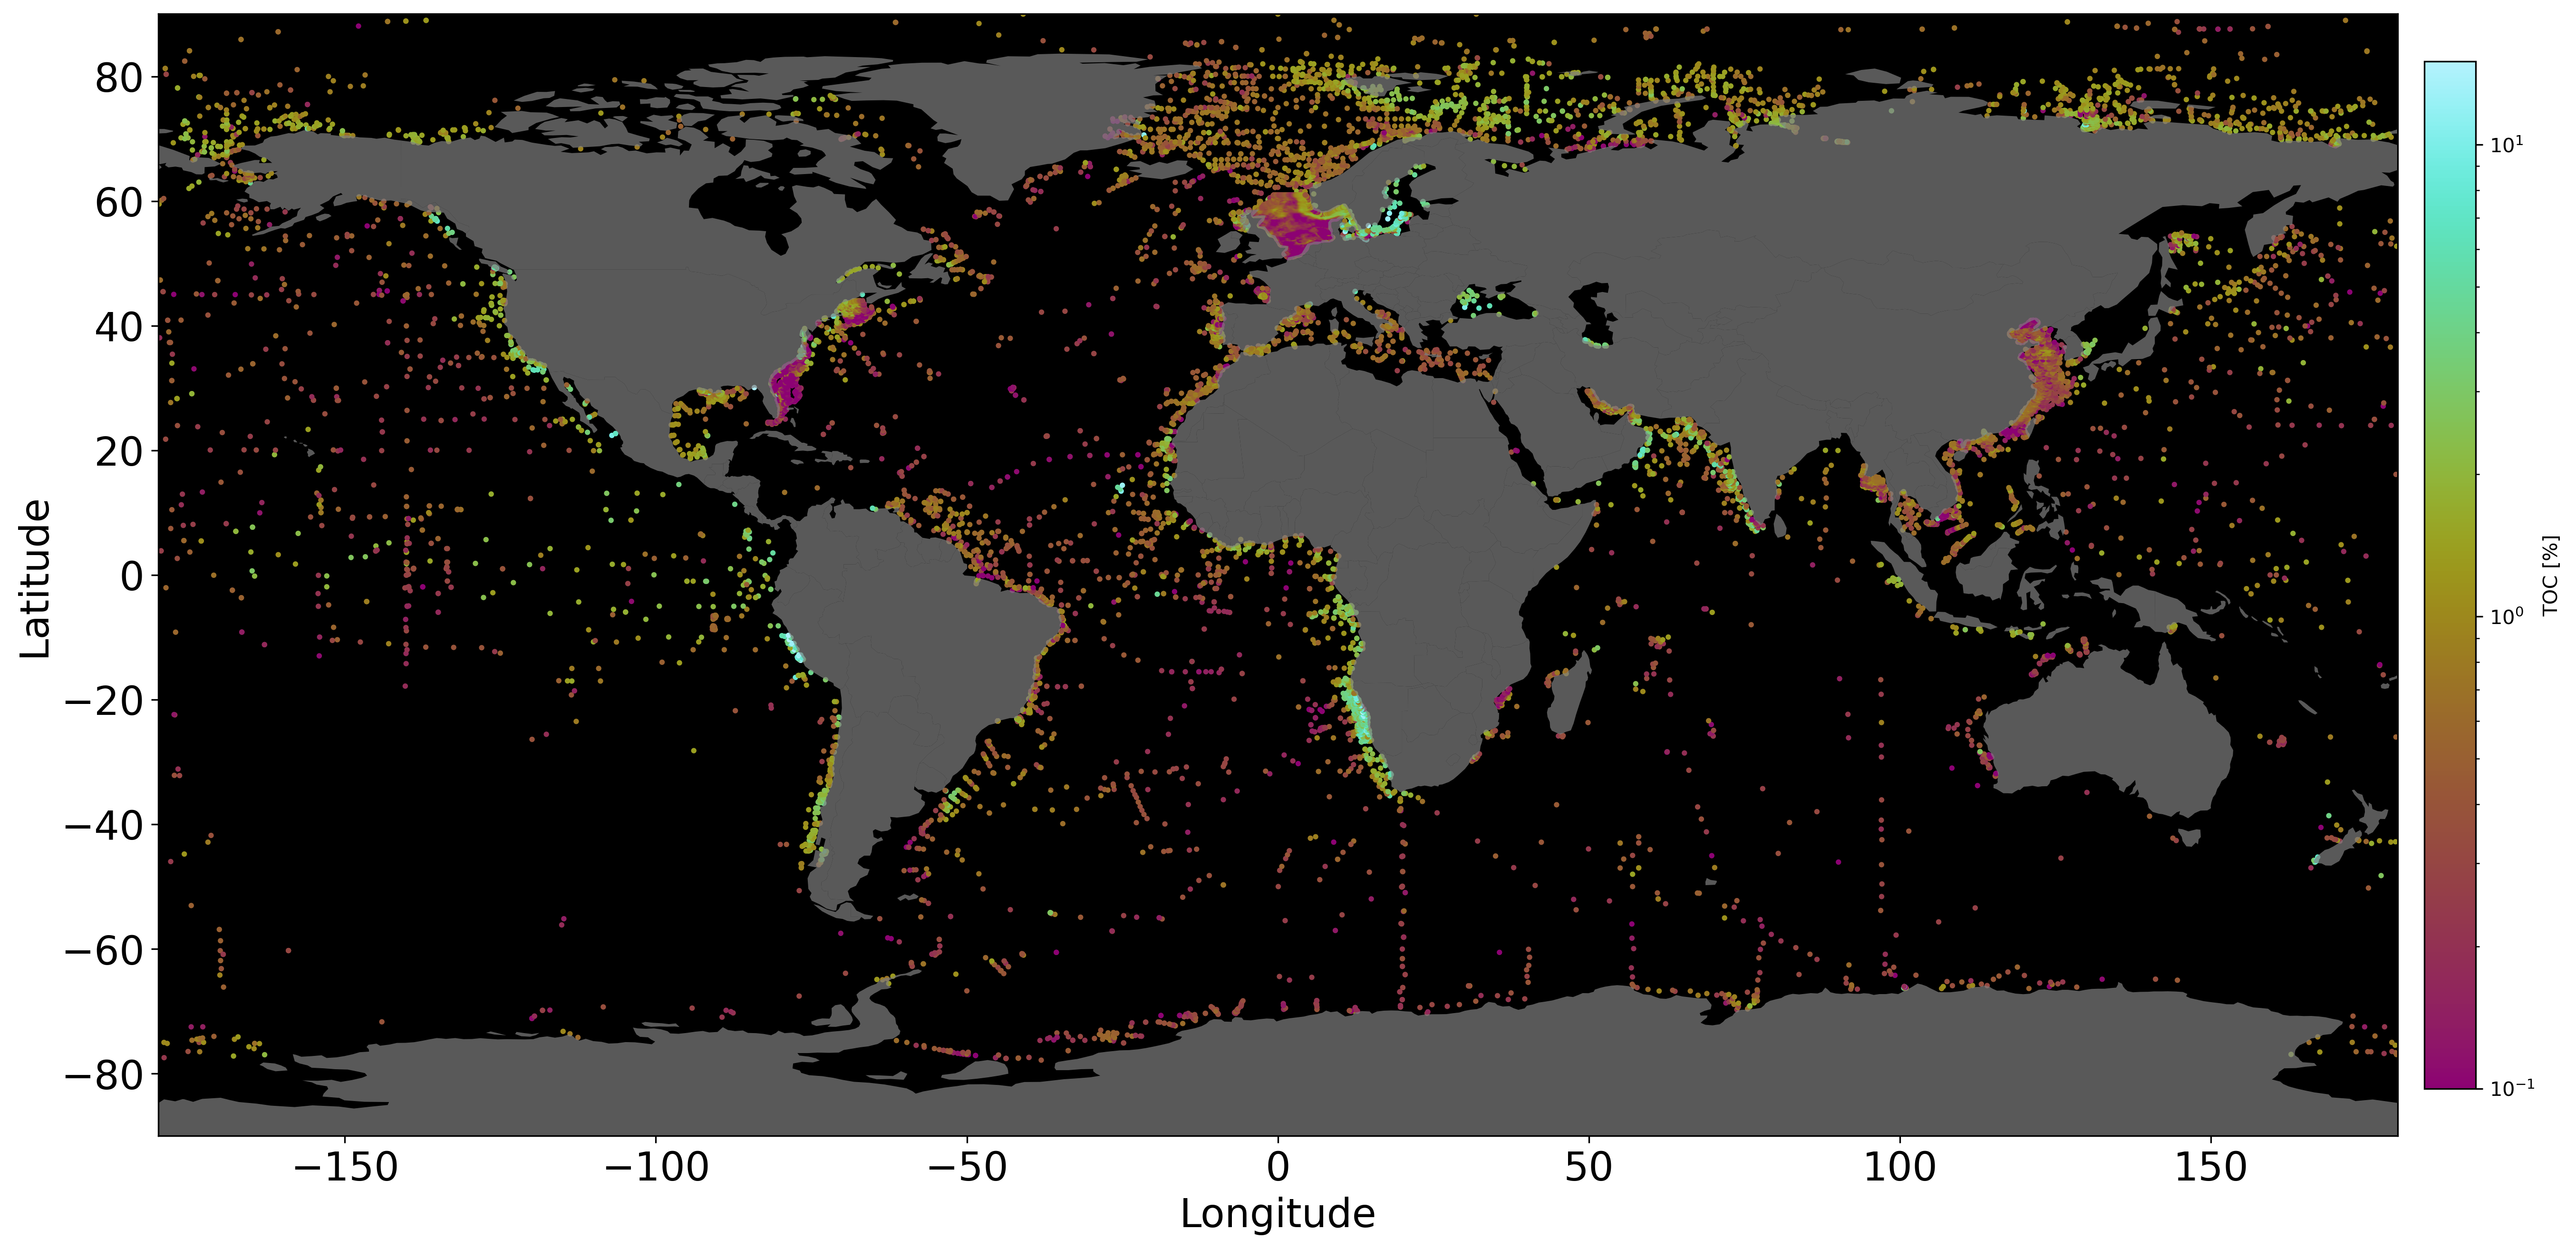

In [51]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmcrameri.cm as cmc
import cmocean as cmo

# Assuming 'world' is a GeoDataFrame of the world boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'df' is your DataFrame with Latitude, Longitude, and TOC columns
df = df.drop_duplicates()

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

# Plotting the world map with a light blue background
ax.set_facecolor('black')  # Light blue color

# Plotting the GeoDataFrame with log-scale color map and smaller points
#gdf.plot(ax=ax, column=df["TOC [%]"], cmap='cubehelix', norm=LogNorm(vmin=1e-1, vmax = 15), legend=True, markersize=3, legend_kwds={
#        "shrink":.75, "label": "TOC [%]", "pad" : 0.05})
cax = gdf.plot(ax=ax, column=df["TOC [%]"], cmap=cmc.hawaii, norm=LogNorm(vmin=1e-1, vmax=15), legend=True, markersize=3, legend_kwds={
    "shrink": 0.75,
    "label": "TOC [%]",
    "pad": 0.01# Title of the color bar
})


world.plot(ax=ax, alpha=0.7, color='grey')


# Set font size for all elements
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
#plt.title("TOC data points", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(fontsize=20)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
#plt.title("TOC data points")
plt.tight_layout()
plt.show()



In [52]:
#feature_image_path ="/media/nparameswaran/EXTERNAL_USB/LeeKNNsTOC(Data)/RestrepoFeatureMaps/"
restrepo_features_path = Path("/gxfs_work/cau/sunms498/work/nn-toc/data/raw/features/FeaturesPhrampusLee_TOCSedRate_updated")
#restrepo_features_path_flipped = Path("/media/nparameswaran/EXTERNAL_USB/Features_Phrampus_flipped")
restrepo_files = []

for (dirpath, dirnames, filenames) in walk(restrepo_features_path):
    restrepo_files.extend(filenames)

restrepo_files.sort()
len(restrepo_files)

rootgrp = xr.open_dataset(Path(restrepo_features_path / restrepo_files[0]), format = 'NETCDF4')
latitudes = rootgrp.variables['lat']
longitudes = rootgrp.variables['lon']

restrepo_features = np.empty([len(df),len(restrepo_files[0:len(restrepo_files)])])
restrepo_features[:] = np.nan
restrepo_X_mean = np.empty(0)
restrepo_X_std = np.empty(0)

file_idx = -1
corrupted_files = 0

/gxfs_home/cau/sunms498/.conda/envs/pytorch/lib/python3.11/site-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [53]:
def find_nearest(value,vector):
    vector = np.float64(vector)-np.float64(value);
    return np.argmin(np.abs(vector))

for file in restrepo_files[0:len(restrepo_files)]:
    if file == "GL_ELEVATION_M_ASL_ETOPO2v2.5m.grd":
        
        try: 
            rootgrp = xr.open_dataset(Path(restrepo_features_path / file), format = 'NETCDF4')
        except:
            restrepo_X_mean = np.append(restrepo_X_mean,np.nan)
            restrepo_X_std = np.append(restrepo_X_std,np.nan)
            corrupted_files = corrupted_files + 1
            continue
    

        
        dataset = rootgrp.variables['data']
    
        restrepo_X_mean = np.append(restrepo_X_mean,np.nanmean(dataset))
        restrepo_X_std = np.append(restrepo_X_std,np.nanstd(dataset))
        #plt.figure(figsize=([20,10]), dpi=300);plt.imshow(np.rot90(np.rot90(np.fliplr(dataset_numpy))))
        dataset_numpy = dataset.to_numpy()

        filename=file
    else:
        continue

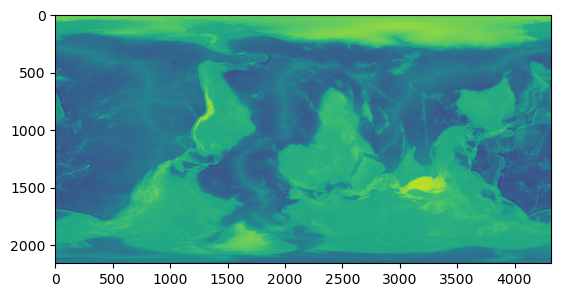

In [54]:
plt.imshow(dataset_numpy)

In [ ]:
#mask1 is <-200m
#mask2 is >-200m
a = dataset_numpy > -200
b = dataset_numpy < 0
mask1 = np.where(np.logical_and(a, b), 1, np.nan) #255 and 0 are the binary values for true and false
mask2 = np.where(dataset_numpy <= -200 , 1,np.nan) 
#mask1 = np.rot90(np.rot90(np.fliplr(mask1)))
df1 = pd.DataFrame()
df2 = pd.DataFrame()

lat_idx_shallow = []
lon_idx_shallow = []
elevation_cs = []


dataset = mask1

for data_idx in range(0,len(df)):
    lat_idx = find_nearest(df.iloc[data_idx,0], latitudes)
    lon_idx = find_nearest(df.iloc[data_idx,1], longitudes)
    #plt.figure(data_idx)
    #plt.imshow(mask1[-10:10,-10:10])
    if mask1[lat_idx, lon_idx]==1:
        elevation_cs.append(dataset_numpy[lat_idx, lon_idx])
        #plt.imshow(mask1[-10:10,-10:10])
        if df1.empty:
            df1 = df.iloc[data_idx]
        else:
            df1 = pd.concat([df1, df.iloc[data_idx]], axis=1, ignore_index=True)
    if mask2[lat_idx, lon_idx]==1:
        if df2.empty:
            df2 = df.iloc[data_idx]
        else:
            df2 = pd.concat([df2, df.iloc[data_idx]], axis=1, ignore_index=True)
    if data_idx%1000 == 0:
        print(data_idx)
    # latitudes_labels.append(latitudes[lat_idx])
    # longitudes_labels.append(longitudes[lon_idx])
df1 = df1.transpose()
df2 = df2.transpose()

#df1 = df1[df1.iloc[:,2] < 5000 ]
#df2 = df2[df2.iloc[:,2] < 1000 ]

np.save("/gxfs_work/cau/sunms498/work/nn4sedratetoc/data/interim/masks/",mask2)
df1.to_csv("/gxfs_work/cau/sunms498/work/nn4sedratetoc/data/raw/labels/toc_continentalshelves_v2.csv") 
df2.to_csv("/gxfs_work/cau/sunms498/work/nn4sedratetoc/data/raw/labels/toc_deep_v2.csv")

#df1 = df1[df1["Sedimentation rate [cm/ka]"]<1]

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.figure(figsize = ([20,10]), dpi = 200)
#plt.title("Continental shelves(elevation of 0  to -200 $m$)")

plt.imshow(np.rot90(np.rot90(np.fliplr(mask1))))
# plt.show()

plt.figure(figsize = ([20,10]), dpi = 200)
#plt.title("Continental shelves(elevation of 0  to -200 $m$)")

# Create a custom colormap for True and False values
cmap = plt.cm.get_cmap('viridis', 2)  # Use 'viridis' colormap with 2 colors (for True and False)

# Plot the mask2 array
plt.imshow(np.rot90(np.rot90(np.fliplr(mask2))), cmap=cmap)

# Set the ticks and labels for the colorbar
cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['False', 'True'])  # Replace the default ticks (0 and 1) with 'False' and 'True'

# Set the colorbar label
cbar.set_label('Mask Value', rotation=270, labelpad=20)

# Show the plot
plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
